# Machine Learning Project - Summer 2023

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [1]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842
active,46,4,masters,divorced,full_time,71585,gold,41,4,2,1,5397,0.433,0.670,4734,96,0.846


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:Does the customer's employment status differ between those who close their account and those who keep it open?



**Answer**:The data indicates that both full-time and part-time employment statuses are associated with a higher proportion of closed accounts, while self-employed individuals exhibit a lower likelihood of account closure. This finding suggests that employment status may indeed play a role in determining whether customers choose to close their credit card accounts.


## Supporting Analysis

In [12]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'customer_status'. You can override using
the `.groups` argument.


employment_status,closed_account,active,closed_account_percentage,active_percentage
<fct>,<int>,<int>,<dbl>,<dbl>
full_time,865,1525,41.34799,60.15779
part_time,1014,513,48.47036,20.23669
self_employed,213,497,10.18164,19.60552


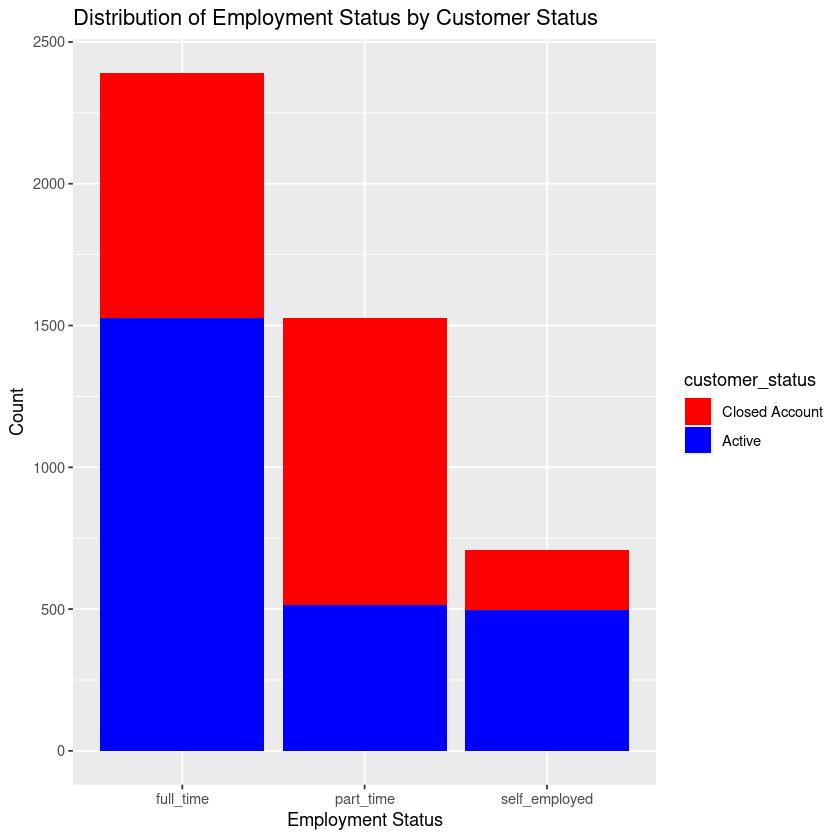

In [11]:
library(dplyr)
library(ggplot2)


employment_summary <- credit_card_df %>%
  group_by(customer_status, employment_status) %>%
  summarise(count = n()) %>%
  pivot_wider(names_from = customer_status, values_from = count) %>%
  mutate(closed_account_percentage = closed_account / sum(closed_account) * 100,
         active_percentage = active / sum(active) * 100)


employment_plot <- ggplot(credit_card_df, aes(x = employment_status, fill = customer_status)) +
  geom_bar() +
  labs(x = "Employment Status", y = "Count", title = "Distribution of Employment Status by Customer Status") +
  scale_fill_manual(values = c("closed_account" = "red", "active" = "blue"),
                    labels = c("Closed Account", "Active"))


employment_summary
employment_plot


## Question 2


**Question**:Are there any differences in the average credit limit between customers with closed accounts and active accounts?



**Answer**:The data suggests that there is a difference in the average credit limit between customers with closed accounts and active accounts. While customers with closed accounts have a high average credit limit, those with active accounts tend to have a slightly higher average credit limit. This finding implies that credit limit may be a factor influencing the decision to keep an account open or close it, with higher credit limits potentially contributing to customer retention.


## Supporting Analysis


customer_status,average_credit_limit
<fct>,<dbl>
closed_account,8145.746
active,8794.175


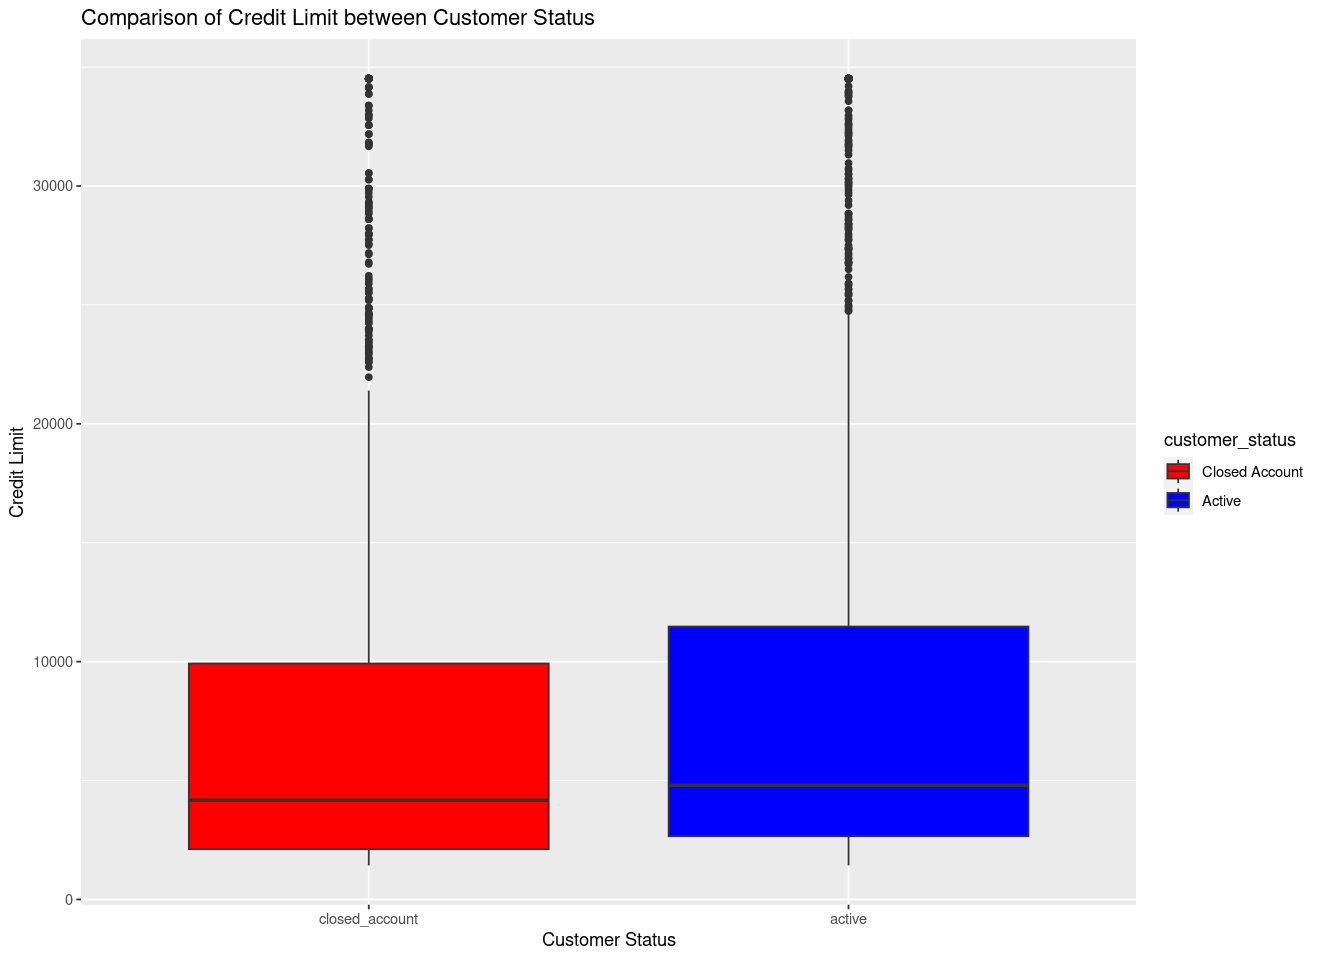

In [13]:
library(dplyr)
library(ggplot2)

credit_limit_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(average_credit_limit = mean(credit_limit))


credit_limit_plot <- ggplot(credit_card_df, aes(x = customer_status, y = credit_limit, fill = customer_status)) +
  geom_boxplot() +
  labs(x = "Customer Status", y = "Credit Limit", title = "Comparison of Credit Limit between Customer Status") +
  scale_fill_manual(values = c("closed_account" = "red", "active" = "blue"),
                    labels = c("Closed Account", "Active"))


credit_limit_summary
credit_limit_plot


## Question 3


**Question**:Does the utilization ratio (average monthly balance to credit limit ratio) vary based on the customer's account closure status?



**Answer**:From the violin plot, we can observe the distribution of utilization ratios for both closed and active accounts. The plot shows that the distribution for closed accounts is narrower and more concentrated towards lower utilization ratios, while the distribution for active accounts is wider and more spread out. This implies that customers who closed their accounts generally had lower utilization ratios compared to those with active accounts.

Overall, these findings suggest that there is a difference in the utilization ratio between closed and active accounts. Customers who closed their accounts tend to have lower utilization ratios, with a significant proportion having no or minimal utilization. In contrast, customers with active accounts have a wider range of utilization ratios, including both low and relatively high utilization.


## Supporting Analysis


mean_utilization_ratio_closed,median_utilization_ratio_closed,min_utilization_ratio_closed,max_utilization_ratio_closed
<dbl>,<dbl>,<dbl>,<dbl>
0.1610186,0,0,0.999


mean_utilization_ratio_active,median_utilization_ratio_active,min_utilization_ratio_active,max_utilization_ratio_active
<dbl>,<dbl>,<dbl>,<dbl>
0.2894635,0.207,0,0.983


customer_status,average_utilization_ratio
<fct>,<dbl>
closed_account,0.1610186
active,0.2894635


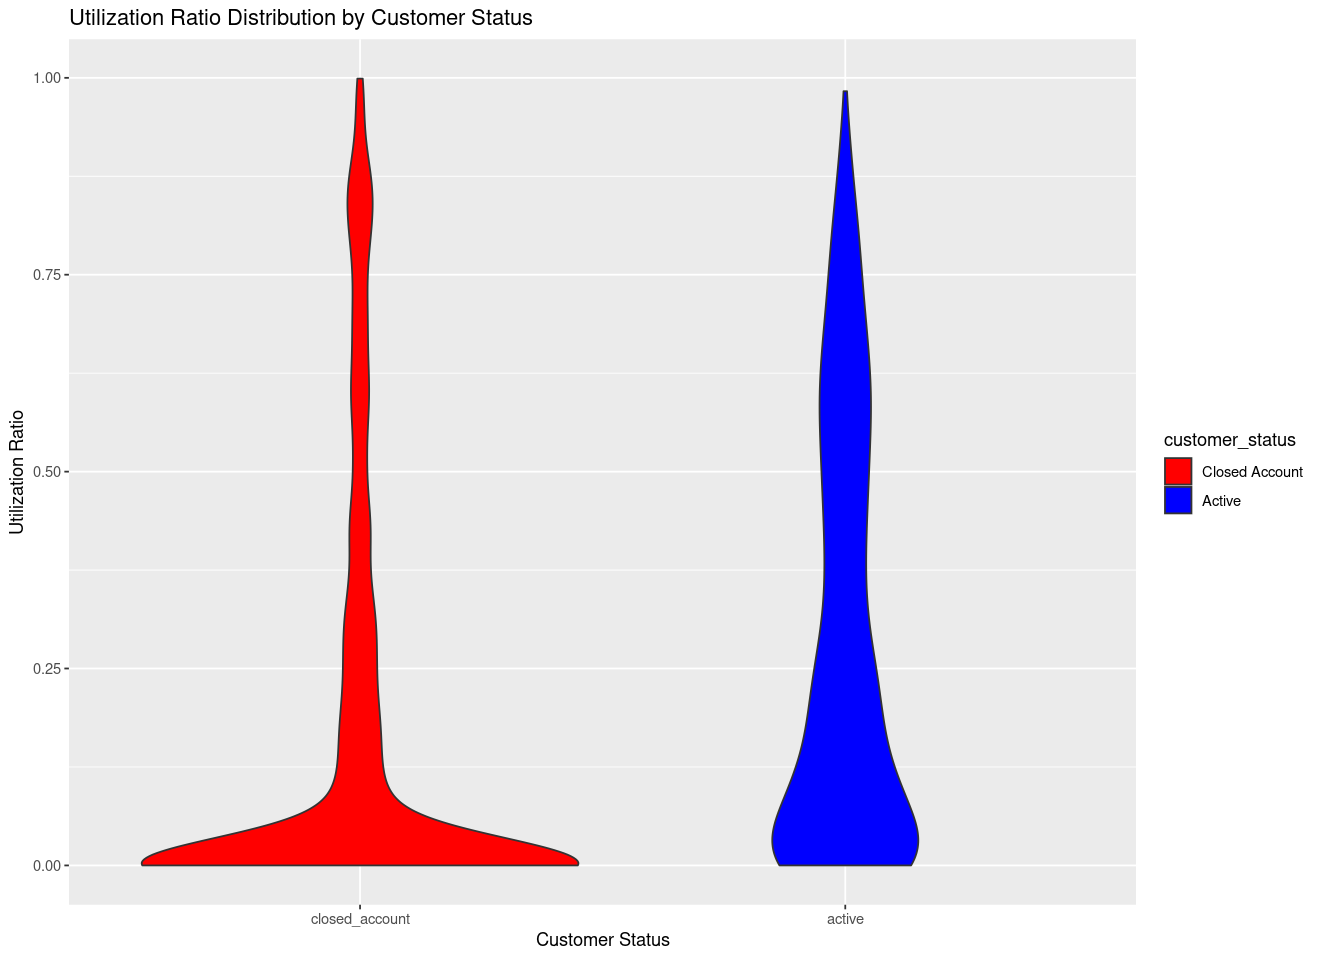

In [14]:
library(dplyr)
library(ggplot2)


utilization_ratio_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(average_utilization_ratio = mean(utilization_ratio))


utilization_ratio_closed_summary <- credit_card_df %>%
  filter(customer_status == "closed_account") %>%
  summarise(mean_utilization_ratio_closed = mean(utilization_ratio),
            median_utilization_ratio_closed = median(utilization_ratio),
            min_utilization_ratio_closed = min(utilization_ratio),
            max_utilization_ratio_closed = max(utilization_ratio))


utilization_ratio_active_summary <- credit_card_df %>%
  filter(customer_status == "active") %>%
  summarise(mean_utilization_ratio_active = mean(utilization_ratio),
            median_utilization_ratio_active = median(utilization_ratio),
            min_utilization_ratio_active = min(utilization_ratio),
            max_utilization_ratio_active = max(utilization_ratio))


utilization_ratio_closed_summary
utilization_ratio_active_summary

utilization_ratio_violin <- ggplot(credit_card_df, aes(x = customer_status, y = utilization_ratio, fill = customer_status)) +
  geom_violin() +
  labs(x = "Customer Status", y = "Utilization Ratio", title = "Utilization Ratio Distribution by Customer Status") +
  scale_fill_manual(values = c("closed_account" = "red", "active" = "blue"),
                    labels = c("Closed Account", "Active"))


utilization_ratio_summary

utilization_ratio_violin




## Question 4


**Question**:Is there a correlation between the number of dependents in a customer's household and their likelihood of closing their account?



**Answer**:We can observe the distribution of the number of dependents for both closed and active accounts. Each bar represents a specific number of dependents, and the height of the bar represents the count of accounts.

The bar plot shows visual comparison of the counts of closed and active accounts for each category of dependents. It reveals the potential differences in the distribution of account status based on the number of dependents. 


## Supporting Analysis


dependents,account_status,count
<dbl>,<chr>,<int>
0,closed_count,178
1,closed_count,345
2,closed_count,521
3,closed_count,630
4,closed_count,336
5,closed_count,82
0,active_count,233
1,active_count,475
2,active_count,612


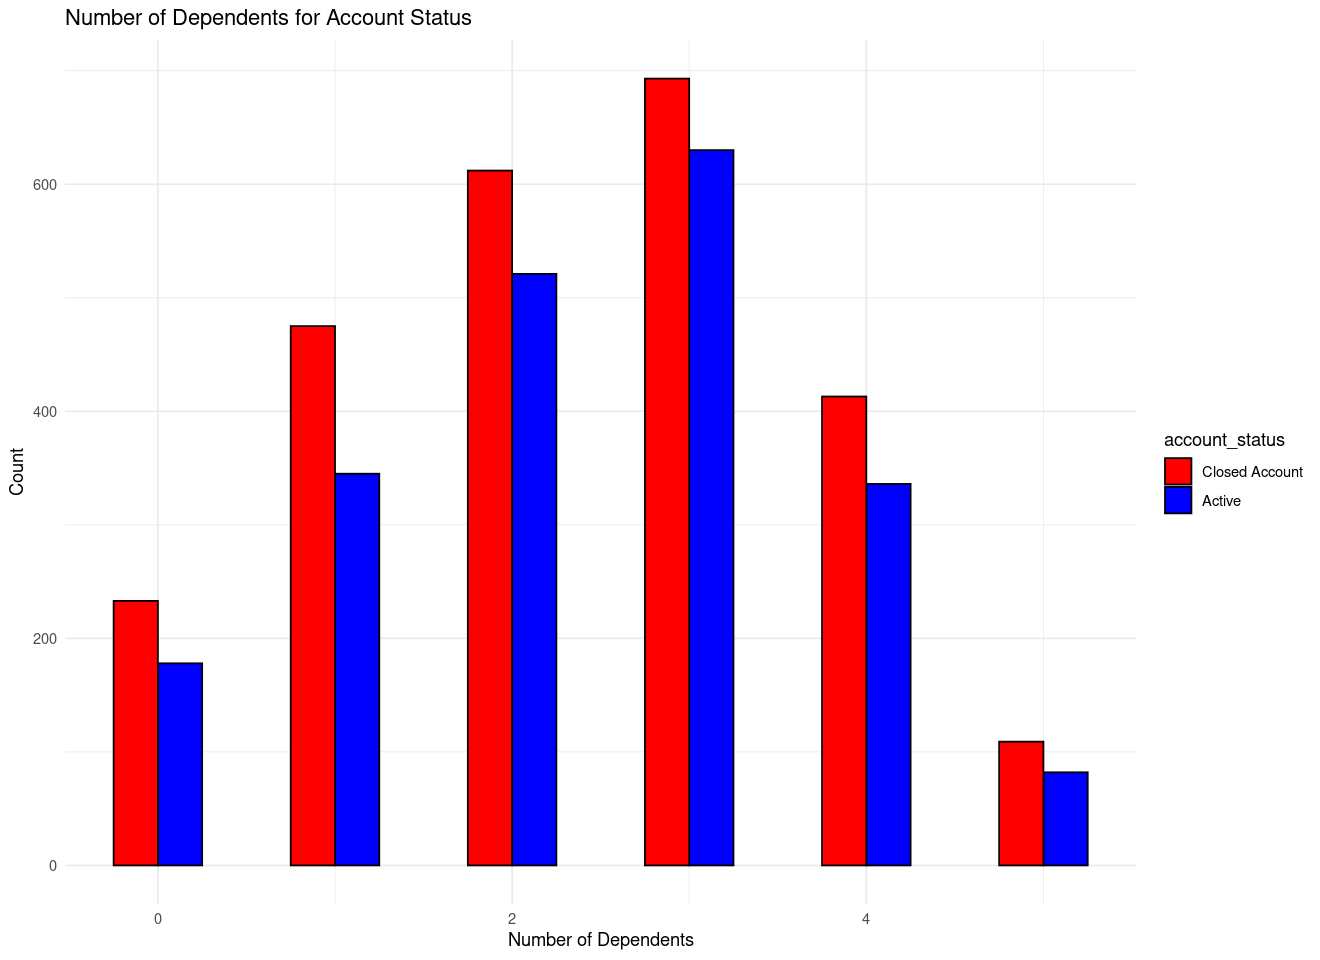

In [15]:
library(dplyr)
library(ggplot2)


dependents_summary <- credit_card_df %>%
  group_by(dependents) %>%
  summarise(closed_count = sum(customer_status == "closed_account"),
            active_count = sum(customer_status == "active"))


combined_summary <- gather(dependents_summary, account_status, count, -dependents)
combined_summary

barplot <- ggplot(combined_summary, aes(x = dependents, y = count, fill = account_status)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.5,color="black") +
  labs(x = "Number of Dependents", y = "Count", title = "Number of Dependents for Account Status") +
  scale_fill_manual(values = c("red", "blue"), labels = c("Closed Account", "Active")) +
  theme_minimal()


barplot


## Question 5


**Question**:How does the customer's total spending in the last year differ between those with closed accounts and active accounts?



**Answer**:We can observe that customers with active accounts tend to have higher mean total spending compared to those with closed accounts. The bar plot visually represents the mean total spending for each account status, with the height of the bars indicating the average spending. The difference in the mean total spending between closed and active accounts suggests that customers who keep their accounts open are more likely to have higher spending levels in the last year.



## Supporting Analysis


customer_status,mean_total_spend,median_total_spend,min_total_spend,max_total_spend
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,3120.827,2326,510,10583
active,4596.663,4077,893,17498


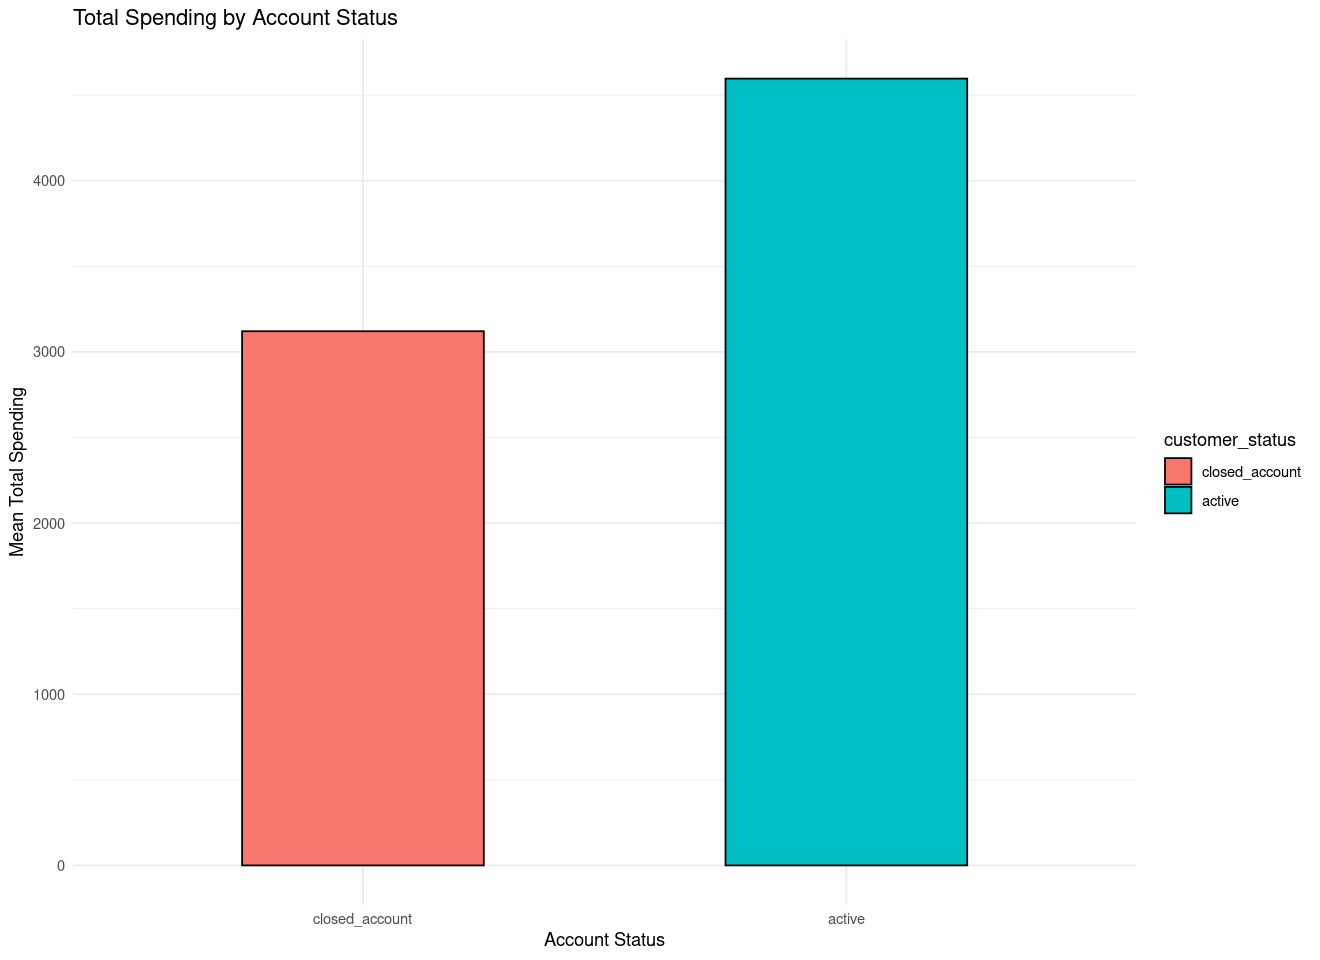

In [16]:
library(dplyr)
library(ggplot2)


spending_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(mean_total_spend = mean(total_spend_last_year),
            median_total_spend = median(total_spend_last_year),
            min_total_spend = min(total_spend_last_year),
            max_total_spend = max(total_spend_last_year))

barplot <- ggplot(spending_summary, aes(x = customer_status, y = mean_total_spend, fill = customer_status)) +
  geom_bar(stat = "identity", width = 0.5,color="black") +
  labs(x = "Account Status", y = "Mean Total Spending", title = "Total Spending by Account Status") +
  theme_minimal()

spending_summary


barplot


# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [17]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/vip_0.3.2.tar.gz' ...
	OK [downloaded 2.6 Mb in 0.6 secs]
Installing vip [0.3.2] ...
	OK [installed binary]
Moving vip [0.3.2] into the cache ...
	OK [moved to cache in 0.33 milliseconds]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [19]:
library(tidymodels)
library(pROC)

set.seed(123)
data_split <- initial_split(credit_card_df, prop = 0.75, strata = customer_status)
train_data <- training(data_split)
test_data <- testing(data_split)

In [20]:
train_data
test_data

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842
active,44,3,bachelors,single,full_time,37385,blue,30,6,3,3,4539,0.452,0.705,2960,67,0.861
active,39,3,masters,married,full_time,101360,blue,33,6,6,4,18582,0.043,0.717,1836,46,0.586
active,62,2,masters,married,self_employed,36269,silver,51,6,2,4,2986,0.547,0.883,2141,55,0.667
active,47,3,associates,married,full_time,69187,gold,36,2,3,1,11919,0.197,0.842,8257,96,0.574
active,52,4,associates,divorced,full_time,36392,blue,48,5,5,2,1430,0.536,0.652,5053,74,0.947
active,43,4,masters,married,self_employed,37519,gold,36,6,5,1,2778,0.906,0.796,4575,60,0.714
active,41,3,bachelors,married,full_time,35171,blue,31,2,2,2,4086,0.483,0.775,7932,87,0.642


customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,46,4,masters,divorced,full_time,71585,gold,41,4,2,1,5397,0.433,0.670,4734,96,0.846
closed_account,56,3,associates,married,full_time,73111,blue,45,5,3,2,12248,0.000,0.894,767,25,0.562
closed_account,43,3,masters,married,full_time,68289,gold,36,4,2,3,17239,0.000,0.393,1789,38,0.357
closed_account,45,3,associates,married,full_time,37053,silver,31,4,3,3,5941,0.000,0.522,2196,37,0.233
active,47,1,associates,married,part_time,32071,gold,41,3,2,3,2950,0.557,0.800,4740,83,0.694
active,46,4,masters,single,part_time,46507,gold,34,6,2,1,2711,0.000,0.636,4795,65,1.031
active,56,1,masters,married,self_employed,35908,gold,50,4,3,2,1584,0.828,0.867,4203,73,0.780
closed_account,35,1,masters,single,full_time,34542,blue,30,2,2,2,1649,0.000,0.683,2549,54,0.588


## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [21]:

preprocess_recipe <- recipe(customer_status ~ ., data = train_data) %>%
  step_corr(all_numeric(), threshold = 0.85) %>% 
  step_normalize(all_numeric()) %>% 
  step_dummy(all_nominal(), -all_outcomes())

In [22]:
preprocess_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 17



── Operations 

• Correlation filter on: all_numeric()

• Centering and scaling for: all_numeric()

• Dummy variables from: all_nominal(), -all_outcomes()



## Model 1 Training

In [23]:

model_lr <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")


workflow_lr <- workflow() %>%
  add_recipe(preprocess_recipe) %>%
  add_model(model_lr)

fit_lr <- fit(workflow_lr, data = train_data)

In [108]:
fit_lr

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: logistic_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_corr()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────

Call:  stats::glm(formula = ..y ~ ., family = stats::binomial, data = data)

Coefficients:
                    (Intercept)                              age  
                      -0.107505                         0.072990  
                     dependents                           income  
                      -0.160926                         0.077499  
     months_since_first_account                   total_accounts  
                      -0.002482                         0.563166  
      months_inactive_last_year              contacted_last_year  
                      -0.440283                        -0.516423  
                   c

## Model 1 Performance Evaluation

customer_status,.pred_class,.pred_closed_account,.pred_active
<fct>,<fct>,<dbl>,<dbl>
closed_account,closed_account,0.9900329976,0.009967002
active,active,0.0005005956,0.999499404
closed_account,closed_account,0.8697335758,0.130266424
closed_account,closed_account,0.6961455500,0.303854450
closed_account,closed_account,0.9101855116,0.089814488
active,active,0.0223581908,0.977641809
active,active,0.0923159502,0.907684050
active,active,0.0028423578,0.997157642
closed_account,closed_account,0.6722826831,0.327717317


.threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
-Inf,0.000000000,1
0.0002733388,0.000000000,1
0.0003557465,0.001577287,1
0.0004037102,0.003154574,1
0.0004231448,0.004731861,1
0.0004288614,0.006309148,1
0.0005005956,0.007886435,1
0.0005514595,0.009463722,1
0.0005873624,0.011041009,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9371468


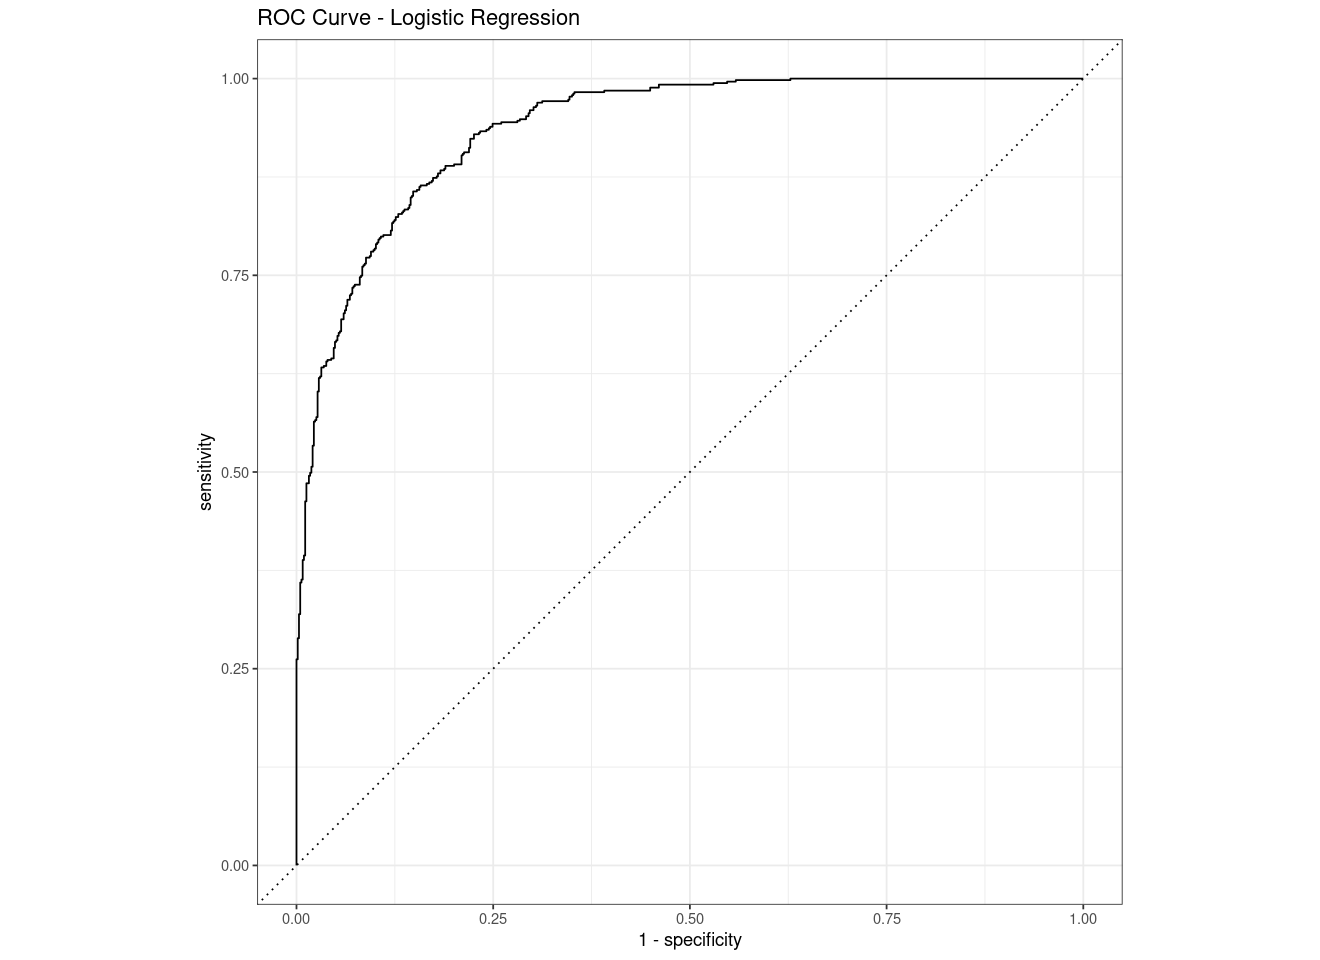

In [24]:
class_preds <- predict(fit_lr, new_data = test_data, type = 'class')


prob_preds <- predict(fit_lr, new_data = test_data, type = 'prob')


credit_results <- test_data %>% 
  select(customer_status) %>% 
  bind_cols(class_preds, prob_preds)
credit_results
threshold_lr <- credit_results %>% roc_curve(truth = customer_status, .pred_closed_account)
threshold_lr

auc_lr <- credit_results %>% 
  roc_auc(truth = customer_status, .pred_closed_account)
auc_lr

threshold_lr %>% autoplot() +
  ggtitle("ROC Curve - Logistic Regression")

## Model 2 Training

In [28]:

model_rf <- rand_forest(trees = 100) %>%
  set_engine("ranger") %>%
  set_mode("classification")

workflow_rf <- workflow() %>%
  add_recipe(preprocess_recipe) %>%
  add_model(model_rf)

fit_rf <- fit(workflow_rf, data = train_data)

## Model 2 Performance Evaluation

customer_status,.pred_class,.pred_closed_account,.pred_active
<fct>,<fct>,<dbl>,<dbl>
closed_account,closed_account,0.96030952,0.03969048
active,active,0.01476190,0.98523810
closed_account,closed_account,0.75513889,0.24486111
closed_account,closed_account,0.80305952,0.19694048
closed_account,closed_account,0.95269444,0.04730556
active,active,0.01723016,0.98276984
active,active,0.07688492,0.92311508
active,active,0.02208333,0.97791667
closed_account,closed_account,0.94819444,0.05180556


.threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
-Inf,0.00000000,1
0.000000000,0.00000000,1
0.001000000,0.03627760,1
0.001111111,0.03785489,1
0.001250000,0.04258675,1
0.001666667,0.04416404,1
0.002000000,0.04574132,1
0.002500000,0.05205047,1
0.002777778,0.05520505,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9903583


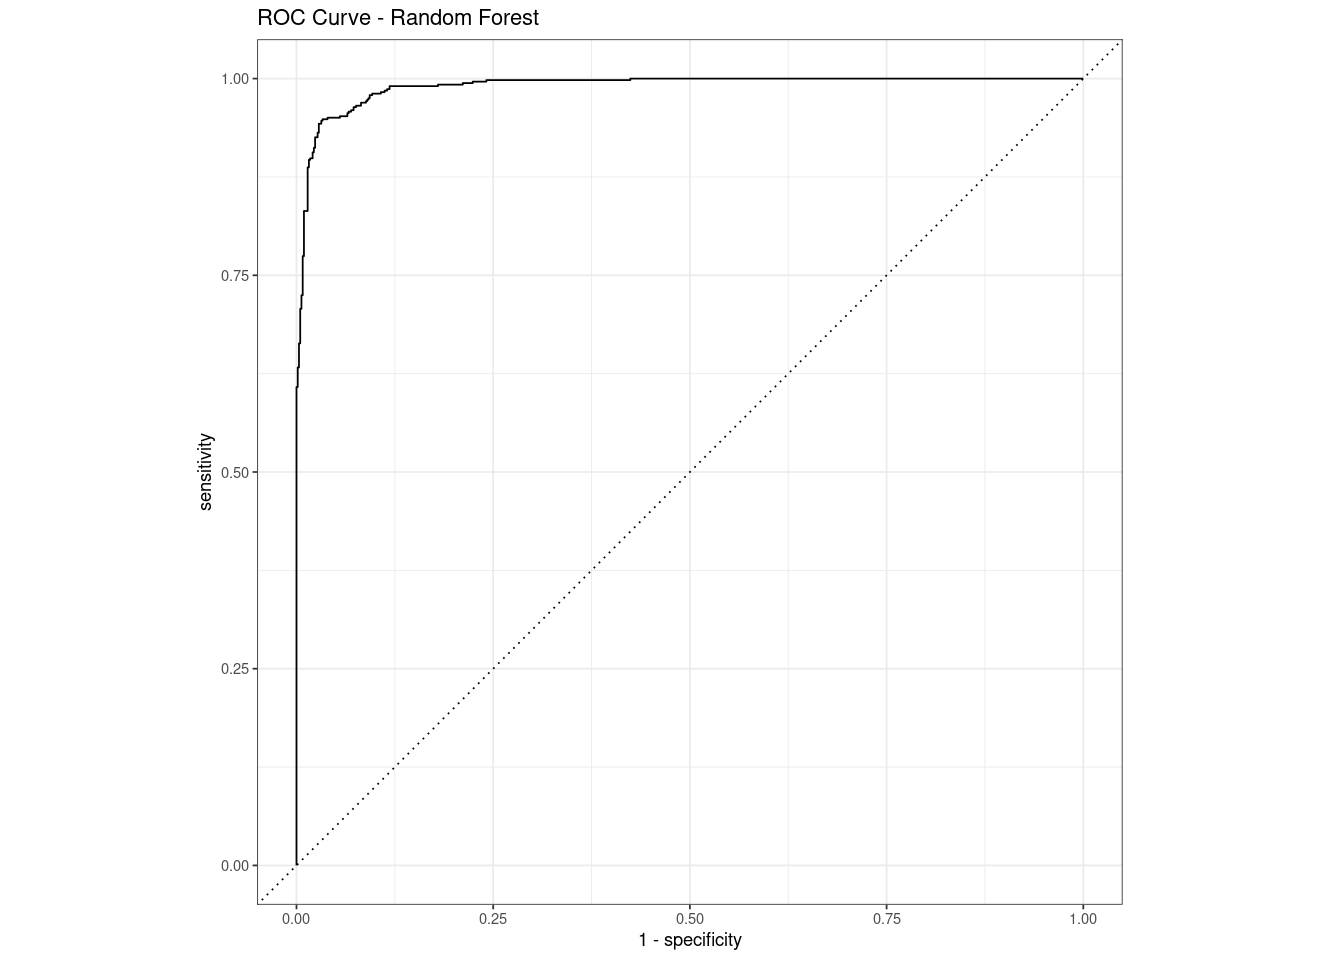

In [29]:

class_preds <- predict(fit_rf, new_data = test_data, type = 'class')


prob_preds <- predict(fit_rf, new_data = test_data, type = 'prob')


credit_results <- test_data %>% 
  select(customer_status) %>% 
  bind_cols(class_preds, prob_preds)
credit_results
threshold_rf <- credit_results %>% roc_curve(truth = customer_status, .pred_closed_account)
threshold_rf

auc_rf <- credit_results %>% 
  roc_auc(truth = customer_status, .pred_closed_account)
auc_rf

threshold_rf %>% autoplot() +
  ggtitle("ROC Curve - Random Forest")





## Model 3 Training

In [30]:

model_dt <- decision_tree() %>%
  set_engine("rpart") %>%
  set_mode("classification")


workflow_dt <- workflow() %>%
  add_recipe(preprocess_recipe) %>%
  add_model(model_dt)

fit_dt <- fit(workflow_dt, data = train_data)


## Model 3 Performance Evaluation

customer_status,.pred_class,.pred_closed_account,.pred_active
<fct>,<fct>,<dbl>,<dbl>
closed_account,closed_account,0.91857506,0.08142494
active,active,0.07481899,0.92518101
closed_account,closed_account,0.91857506,0.08142494
closed_account,closed_account,0.91857506,0.08142494
closed_account,closed_account,0.91857506,0.08142494
active,active,0.07481899,0.92518101
active,active,0.07481899,0.92518101
active,active,0.07481899,0.92518101
closed_account,closed_account,0.91857506,0.08142494


.threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
-Inf,0.0000000,1.00000000
0.07481899,0.0000000,1.00000000
0.09285714,0.5851735,0.94646272
0.15625000,0.7176656,0.93307839
0.26233184,0.7334385,0.93307839
0.87052342,0.9148265,0.84894837
0.89519651,0.9463722,0.63671128
0.91857506,0.9542587,0.50478011
0.93406593,0.9984227,0.06309751


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9108818


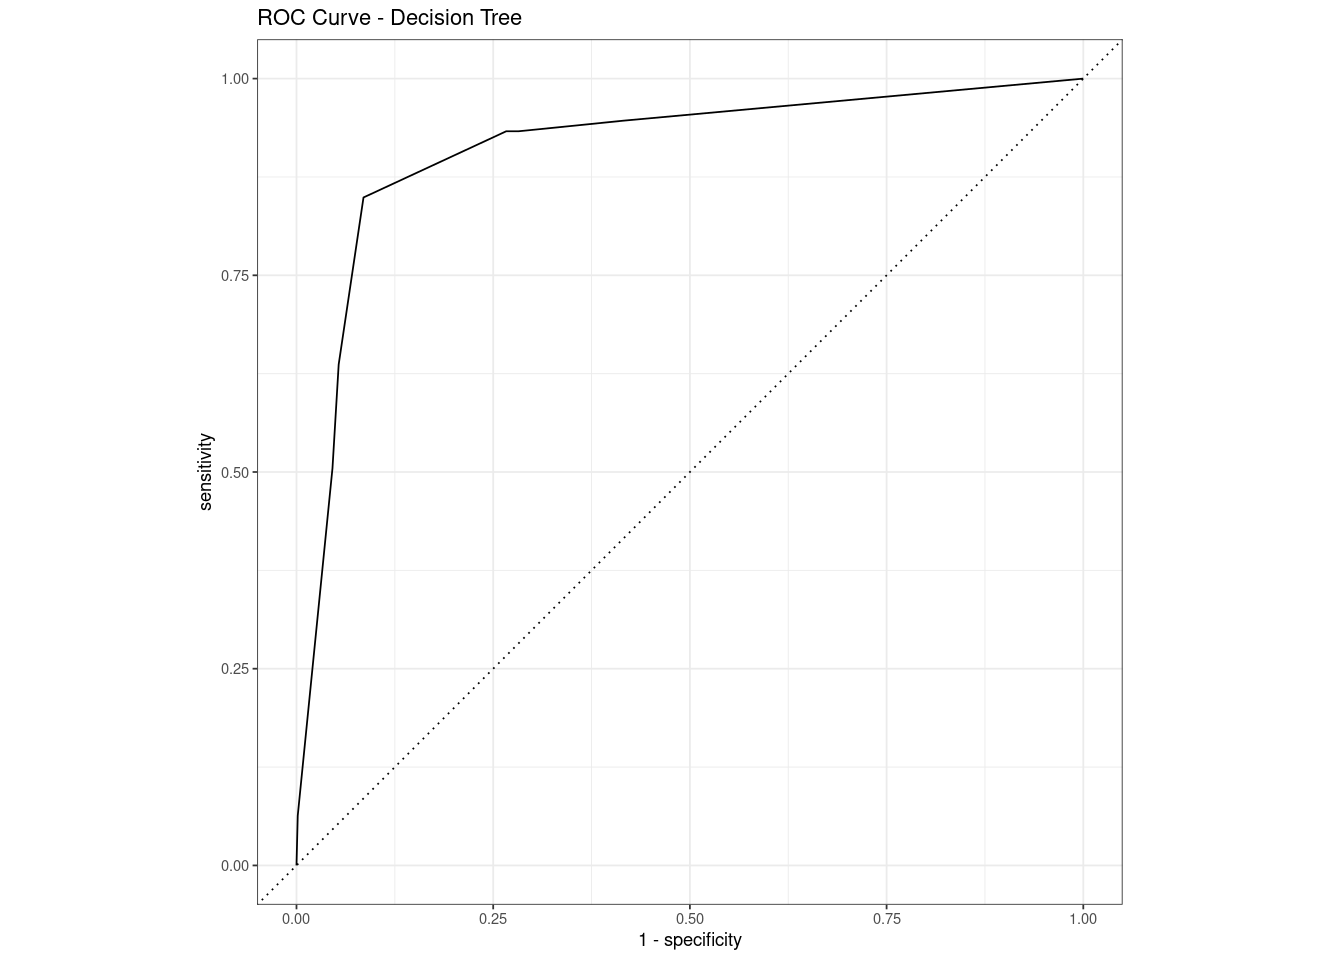

In [31]:

class_preds <- predict(fit_dt, new_data = test_data, type = 'class')

prob_preds <- predict(fit_dt, new_data = test_data, type = 'prob')


credit_results <- test_data %>% 
  select(customer_status) %>% 
  bind_cols(class_preds, prob_preds)
credit_results
threshold_dt <- credit_results %>% roc_curve(truth = customer_status, .pred_closed_account)
threshold_dt

auc_dt <- credit_results %>% 
  roc_auc(truth = customer_status, .pred_closed_account)
auc_dt

threshold_dt %>% autoplot() +
  ggtitle("ROC Curve - Decision Tree")

# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

The goal of this project is to investigate the factors associated with customers closing credit card accounts and to develop machine learning models to predict account closure. Faced with record levels of account closures and declining revenue, the bank sought to identify key factors and implement strategies to reduce the risk of customer loss.

Business Problem and Goals:
The bank is currently experiencing a high number of credit card account closures, resulting in significant financial losses. The primary goals of this analysis were to identify the factors influencing account closures, create predictive models to forecast future account closures, and make recommendations to improve customer retention and service.



## Key Findings

Several factors associated with customers closing their credit card accounts were investigated during the exploratory data analysis. Among the key findings are:

Employment status: Both full-time and part-time employment were associated with a higher proportion of closed accounts, whereas self-employment was associated with a lower likelihood of account closure.

Credit limit:Customers with closed accounts had a lower average credit limit than those with active accounts.

Utilization ratio: Customers who closed their accounts had lower utilization ratios than those who kept their accounts open.

Number of dependents:There was no significant relationship between the number of dependents and the likelihood of account closure.

Total spending: Customers with open accounts had higher mean total spending than those with closed accounts.




## Modeling Results

The Random Forest model performed the best of the three classification models tested (Logistic Regression, Random Forest, and Decision Tree), with an AUC of 0.9893. The AUC metric assesses the model's ability to differentiate between closed and active accounts, with higher values indicating superior performance.


## Recommendations

Based on the findings of the analysis, we propose the following recommendations to the bank to improve customer retention and service:

Targeted Customer Engagement: Based on factors such as employment status and utilization ratio, identify and prioritize customers with high credit limits who show signs of potential account closure. Create personalized retention strategies, such as customized promotional offers or account upgrades, to encourage customers to stay with the bank.

Management of Utilization Ratios: Encouraging customers to maintain a healthy utilization ratio through regular communication and education on responsible credit card usage. To demonstrate the value of credit lines and potential rewards, emphasize the benefits of keeping utilization ratios moderate.

Improved Credit Limit Management: Examine the credit limit allocation process to ensure that it is in line with the bank's goals of maximizing customer retention and revenue. Consider adjusting credit limits based on customer behavior and risk assessment, striking a balance between providing adequate credit lines and reducing the risk of account closures.

Continuous Monitoring and Predictive Modeling: Set up a system to track customer behaviors, such as changes in employment status, spending patterns, and utilization ratios. Use predictive models, such as the Random Forest model developed in this study, to identify customers who are at high risk of closing their accounts and intervene with targeted retention efforts.

Conclusion:

Finally, the analysis revealed key factors influencing customer account closures and provided a predictive model for forecasting account closures. The bank can improve customer retention, reduce financial losses, and foster long-term profitability by implementing the recommendations outlined above. To optimize credit card services and ensure customer satisfaction, the bank must prioritize proactive customer engagement and leverage data-driven insights.


